## Packages

In [0]:
!pip install pmdarima 
!pip install arch
!pip install yfinance

In [0]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

In [0]:
raw_data = yfinance.download (tickers = "AAPL", start = "2010-01-07", 
                              end = "2020-08-05", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

In [0]:
df_comp=df_comp.asfreq('d')
df_comp=df_comp.fillna(method='ffill')

In [0]:
df_comp = raw_data.copy()

In [0]:
apple_df = df_comp.copy()

In [0]:
apple_df = apple_df

In [0]:
del apple_df['Volume']

In [0]:
apple_df.tail()

,Open,High,Low,Close
Date,,,,
2020-05-11,308.100006,317.049988,307.239990,315.010010
2020-05-12,317.829987,319.690002,310.910004,311.410004
2020-05-13,312.149994,315.950012,303.209991,307.649994
2020-05-14,304.510010,309.790009,301.529999,309.540009
2020-05-15,300.350006,307.899994,300.209991,307.709991


## Creating Returns

In [0]:
apple_df['return'] = apple_df.Close.pct_change(1).mul(100)

##Apple stock


In [0]:
apple_df.tail()

,Open,High,Low,Close,return
Date,,,,,
2020-05-11,308.100006,317.049988,307.239990,315.010010,1.573535
2020-05-12,317.829987,319.690002,310.910004,311.410004,-1.142823
2020-05-13,312.149994,315.950012,303.209991,307.649994,-1.207415
2020-05-14,304.510010,309.790009,301.529999,309.540009,0.614339
2020-05-15,300.350006,307.899994,300.209991,307.709991,-0.591205


In [0]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [0]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

## Splitting the Data

In [0]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Fitting a Model

In [0]:
model_ar = ARIMA(df.ftse, order = (1,0,0))
results_ar = model_ar.fit()

## Simple Forecasting

In [0]:
df.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2014-07-09,1972.829956,9808.200195,6718.000000,15302.650391,0.464427,-0.304222,0.363568,-0.076789,-193.623849,39.056133,260.939581,-33.873062
2014-07-10,1964.680054,9659.129883,6672.399902,15216.469727,-0.413107,-0.678775,-1.519854,-0.563175,172.228229,87.141370,-1090.828512,-248.427258
2014-07-11,1967.569946,9666.339844,6690.200195,15164.040039,0.147092,0.266775,0.074644,-0.344559,-61.324138,-34.248669,53.573442,-151.991545
2014-07-14,1977.099976,9783.009766,6746.100098,15296.820312,0.484355,0.835549,1.206971,0.875626,-201.932230,-107.268090,866.266436,386.255523
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,-0.193210,-0.527714,-0.650103,0.642878,80.550866,67.748084,-466.591262,283.585757


In [0]:
df_test.head()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2014-07-16,1981.569946,9859.269531,6784.700195,15379.299805,0.420108,1.105733,1.438970,-0.103022,-175.147139,-141.954374,1032.776421,-45.444849
2014-07-17,1958.119995,9753.879883,6738.299805,15370.259766,-1.183403,-0.683897,-1.068940,-0.058781,493.371572,87.799004,-767.198698,-25.929241
2014-07-18,1978.219971,9720.019531,6749.500000,15215.709961,1.026494,0.166217,-0.347148,-1.005512,-427.954713,-21.338991,-249.154480,-443.550752
2014-07-21,1973.630005,9612.049805,6728.399902,15215.709961,-0.232025,-0.312617,-1.110797,0.000000,96.733401,40.133910,-797.240778,0.000000
2014-07-22,1983.530029,9734.330078,6795.299805,15343.280273,0.501615,0.994291,1.272156,0.838412,-209.127965,-127.647496,913.050985,369.839646


In [0]:
df_test.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2019-08-26,2878.379883,11658.040039,7095.000000,20261.039062,1.098299,0.000000,0.400725,-2.172145,-457.890976,-0.000000,287.608392,-958.175298
2019-08-27,2869.159912,11730.019531,7089.600098,20456.080078,-0.320318,-0.076109,0.617424,0.962641,133.543581,9.770845,443.136860,424.639414
2019-08-28,2887.939941,11701.019531,7114.700195,20479.419922,0.654548,0.354041,-0.247229,0.114097,-272.887157,-45.451925,-177.440970,50.330541
2019-08-29,2924.580078,11838.879883,7184.299805,20460.929688,1.268729,0.978251,1.178191,-0.090287,-528.944997,-125.588193,845.610404,-39.827297
2019-08-30,2926.459961,11939.280273,7207.200195,20704.369141,0.064279,0.318756,0.848057,1.189777,-26.798399,-40.922019,608.666541,524.833644


In [0]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2014-07-15"
end_date = "2015-01-01"

In [0]:
end_date = "2019-10-23"
df_pred = results_ar.predict(start = start_date, end = end_date)

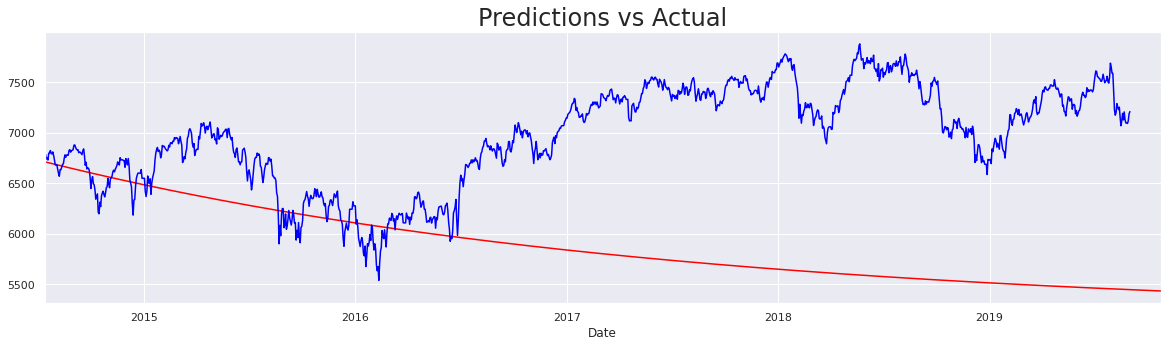

In [0]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()